In [1]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [3]:
#get data from source
html = req.get("https://www.worldometers.info/coronavirus")

In [11]:
#use beautiful soup to organize the html content
parsed_data = BeautifulSoup(html.content)

In [12]:
#search for the datatable
table = parsed_data.find('table', attrs={'id': 'main_table_countries_today'})

In [13]:
#check the table
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

In [15]:
#fetch the rows alone
rows = table.find_all("tr")

In [19]:
#rows result
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br>Deaths</br></th>
 <th width="30">New<br>Deaths</br></th>
 <th width="30">Total<br>Recovered</br></th>
 <th width="30">New<br>Recovered</br></th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style=

In [22]:
#the strip() gets rid of the tags
rows[9].text.strip().split("\n")

['1',
 'USA',
 '89,731,799',
 '',
 '1,043,879 ',
 '',
 '85,389,870',
 '',
 '3,298,050',
 '3,489',
 '267,942',
 '3,117',
 '1,054,100,246',
 '3,147,574',
 '334,892,877 ',
 'North America',
 '43210',
 '',
 '',
 '9,848']

In [23]:
#add rows to the list
data = []
for x in rows:
    data.append(x.text.strip().split("\n")[1:5])

In [24]:
#converts list to dataframe
frame = pd.DataFrame(data)

In [25]:
#you dataframe
frame.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"106,075,079","+28,010","1,489,394"
2,,"162,114,183","+112,731","1,440,588"
3,,"60,098,761","+2,280","1,306,716"
4,,"205,900,923","+35,612","1,857,647"


In [26]:
frame = pd.DataFrame(data[9:], columns=data[0])

In [27]:
frame.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"89,731,799",,"1,043,879"
1,India,"43,547,809",,"525,270"
2,Brazil,"32,610,830",,"672,494"
3,France,"31,658,727",,"149,801"
4,Germany,"28,673,212",,"141,519"


In [28]:
#save to csv file
frame.to_csv('covidrepo.csv')

In [29]:
#get the cols
#country,other as x-axis
#totalcases as y-axis
frame_graph = frame[['Country,Other', 'TotalCases']]

#get your first 10 rows
frame_graph = frame_graph[:10]

#get your df
frame.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"89,731,799",,"1,043,879"
1,India,"43,547,809",,"525,270"
2,Brazil,"32,610,830",,"672,494"
3,France,"31,658,727",,"149,801"
4,Germany,"28,673,212",,"141,519"


In [30]:
#converts totalcases string type to int
frame_graph['TotalCases'] = frame_graph['TotalCases'].apply(lambda x: x.replace(',', '')).astype(int)
frame_graph.head()

,"Country,Other",TotalCases
0,USA,89731799
1,India,43547809
2,Brazil,32610830
3,France,31658727
4,Germany,28673212


<AxesSubplot:xlabel='Country,Other'>

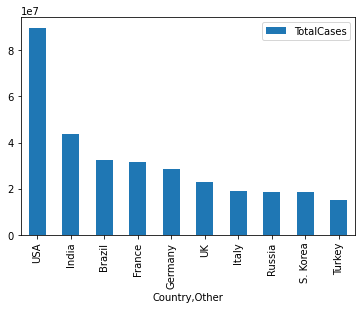

In [36]:
#create graph
frame_graph.plot(kind='bar', x='Country,Other', y='TotalCases')